<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

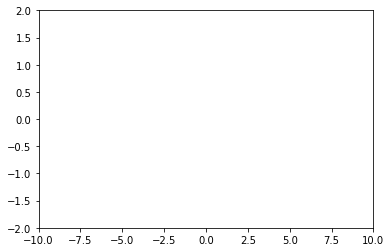

In [4]:
fig = plt.figure();
ax = plt.axes(xlim=(-10, 10), ylim=(-2, 2));
line, = ax.plot([], [], lw=3);

In [5]:
def init():
    line.set_data([], [])
    return line,

def omega(k):
    return np.sqrt(k*np.tanh(k))

def eta(x,t):
    et = 1/2*np.sin(x+omega(1)*t) + 1/2*np.sin(x - omega(1)*t)
    et+= 1/2*np.sin(2(x+omega(2)/2*t)) + 1/2*np.sin(2*(x - omega(2)*t))

    return et

In [7]:
def animate(t):
    x = np.linspace(-10, 10, 1000)
    et = eta(x,t/20)
    line.set_data(x, et)
    return line,

In [10]:
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=20, blit=True)

In [14]:
anim.save('sine_wave.gif', writer='ImageMagickWriter')

/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter ImageMagickWriter unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: outfile must be *.htm or *.html

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


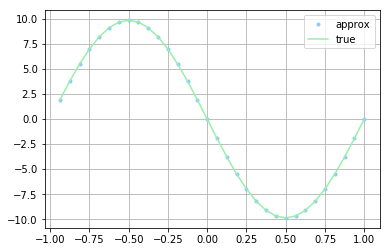

In [7]:
N = 16
x = np.linspace(-1,1,2*N+1)
x = x[1:]

f = np.sin(np.pi*x)
fHat = np.fft.fft(f)

ik = 1j*np.pi*np.hstack([1,np.arange(1,N+1),np.arange(-(N-1),0)])
ik2 = ik**2

uHat = np.zeros(np.shape(fHat),dtype = 'complex128')
uHat[1:] = fHat[1:]*ik2[1:]

u = np.fft.ifft(uHat)
plt.plot(x,u,'.')
plt.plot(x,(-np.pi**2*np.sin(np.pi*x)))
plt.legend(['approx','true'])
plt.grid()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


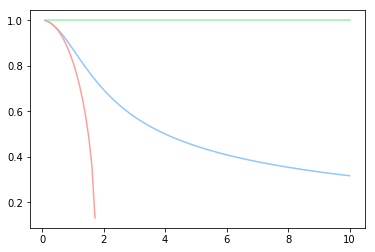

In [9]:
k = np.linspace(0,10,100);
plt.plot(k,np.sqrt(k*np.tanh(k))/k)
plt.plot(k,np.sqrt(k**2)/k)
plt.plot(k,np.sqrt(k*(k - k**3/3))/k)